# A typical sample has log probability equal to minus entropy

In this very short jupyter notebook, we set out to explore typical sets. In Mackay's book, chapter 4, we read an introduction to typical set. With an example from the Bernoulli distribution, we see that the typical samples from any probability distribution have log probability equal to minus entropy.

Wikipedia defines a typical set as `the typical set is a set of sequences whose probability is close to two raised to the negative power of the entropy of their source distribution.`

I have long been confused about typical sets, multivariate gaussians' soap bells and thin shells. Therefore, I wrote a small notebook to bring it all together.

We will walk through the following

  * Samples from a multivariate gaussian will concentrate on a thin shell
  * This thin shell defines the typical set of the multivariate Gaussian
  * Emperically, the samples from the shell have log probability close to minus entropy. (as it is the typical set)
  * Writing out equations, we confirm that typical samples have log probability equal to entropy

In [4]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from scipy.misc import logsumexp
%matplotlib inline

First, we take many samples from a multivariate normal. We plot a histrogram of the norm of these samples. We observe that these samples concentrate around norm equal to `sqrt(num_dim)`

In [5]:
num_dim = 1600  # Number of dimensions in our Gaussian
num_samples = 10000
distr = mvn(cov=np.eye(num_dim))
samples = distr.rvs(size=num_samples)

Text(0,0.5,'Histogram count')

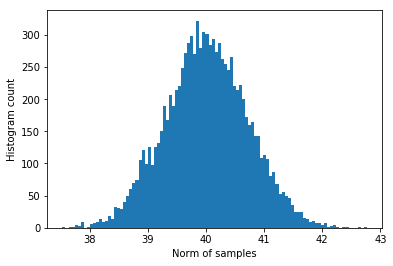

In [6]:
plt.hist(np.sqrt(np.sum(np.power(samples, 2), 1)), bins=100);
plt.xlabel('Norm of samples')
plt.ylabel('Histogram count')

The above histrogram shows our thin shell. Apparently, all the samples concentrate on a shell with radius `sqrt(num_dim)`. In our example, we have sixteen hundred dimensions, and we see that the histogram concentrates around 40.

Below, we glot another histrogram. This time we plot the log probability of the samples that we drew. Again, we observe some concentrating behaviour. The log probability concentrates around -2270. We will see that this number is no coincidence !!!

Text(0,0.5,'histrogram count')

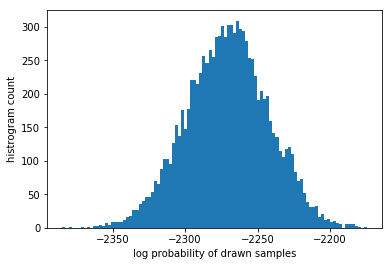

In [9]:
plt.hist(distr.logpdf(samples), bins=100);
plt.xlabel('log probability of drawn samples')
plt.ylabel('histrogram count')

The entropy for our multivariate Gaussian has a closed form: $$\frac{1}{2} log \ \det \ 2 \pi \epsilon \Sigma$$

Using the rule that $\det I = 1$ and the rule that $\det \alpha X = \alpha^{n_d} \det X$, we obtain that the entropy of a unitary Gaussian is 

$$\frac{ n_d}{2} \log 2 \pi \epsilon$$

In [12]:
E = 0.5 * num_dim * np.log((2*np.pi*np.e))
print(f'Entropy of Gaussian is {E}')

Entropy of Gaussian is 2270.301653127476


Here we resolve our coincidence. The histogram of the log probability concentrates around the negative entropy. This observation confirms that typical samples have a log probability of negative entropy

## The mathy version

We can confirm our experiments by writing out the probability of a typical sample:

Let's assume a unitary multivariate gaussian of dimensions $n_d$. Then a typical vector has norm $\sqrt{n_d}$

This norm writes as 
$$\begin{align}
\sqrt{\sum_{i=1}^{n_d} x_i^2} &= \sqrt{n_d} \\ 
\sum_{i=1}^{n_d} x_i^2 &= n_d
\end{align}$$

In general, we know that the probability for a unitary gaussian is:

$$\begin{align}
p(x) &= (2\pi)^{\frac{-n_d}{2}} e^{\frac{-1}{2}\sum_{i=1}^{n_d} x_i^2}
\end{align}$$

Therefore, the probability for a typical x is:
$$\begin{align}
p(typical \ x) &= (2\pi)^{\frac{-n_d}{2}} e^{\frac{-1}{2}\sum_{i=1}^{n_d} (x_{typical, i})^2} \\
 &= (2\pi)^{\frac{-n_d}{2}} e^{\frac{-n_d}{2}} \\ 
 &= e^{\frac{-n_d}{2}\log{2\pi}} e^{\frac{-n_d}{2}} \\ 
 &= e^{\frac{-n_d}{2}\log{2\pi} - \frac{n_d}{2}} \\
 &= e^{\frac{-n_d}{2}\log{2\pi\epsilon}} \\
\end{align}$$

Rewrite the last line to 
$$\log p(typical \ x) = \frac{-n_d}{2}\log{2\pi\epsilon}$$

Now we proved that a typical x has indeed log probability equal to minus the entropy

### Closing

This experiment and bit of math helped resolve a lot of confusion for me around shells, typical sets and all that. I hope it helped you too!

As always, I am curious to any comments and questions. Reach me at romijndersrob@gmail.com